<a href="https://colab.research.google.com/github/SampMark/Machine-Learn/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Modelo de regressão linear simples

Objetivo: prever a emissão de CO2 de veículos (CO2EMISSIONS) com base em características como o tamanho do motor (ENGINESIZE) e o consumo de combustível (FUELCONSUMPTION_COMB).

Tipo de Modelo: prevê a emissão de CO2 usando apenas uma variável preditora por vez (ENGINESIZE ou FUELCONSUMPTION_COMB).

Etapas:

**1) Carregamento e Preparação dos Dados:**
Os dados são carregados de um arquivo CSV (hospedado no GitHub).
Foram divididos em conjuntos de treinamento (80%) e teste (20%).

**2) Treinamento do Modelo:**
Usando a biblioteca scikit-learn o modelo criado e treinado usando os dados de treinamento para encontrar a reta que melhor representa a relação entre a variável preditora e a emissão de CO2.

**3) Avaliação do Modelo:**
O modelo é avaliado usando os dados de teste.
Métricas como Erro Absoluto Médio (MAE), Erro Quadrático Médio (MSE) e R-quadrado são calculadas para medir o desempenho do modelo.

**4) Visualização:**
Gráficos são gerados para visualizar a relação entre as variáveis e a linha de regressão.

**Resumo:**
O código imprime os coeficientes da reta de regressão (coeficiente angular e intercepto). As métricas de avaliação (MAE, MSE e R-quadrado) indicam o quão bem o modelo se ajusta aos dados. Os gráficos ajudam na visualização da relação entre as variáveis e o modelo.

## **Importando os pacotes necessários**

In [ ]:
!pip install scikit-learn
!pip install matplotlib
!pip install pandas
!pip install numpy
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## **Análise Exploratória de Dados**

In [ ]:
# importando e explorando os dados
df = pd.read_csv("https://raw.githubusercontent.com/SampMark/files/refs/heads/main/FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


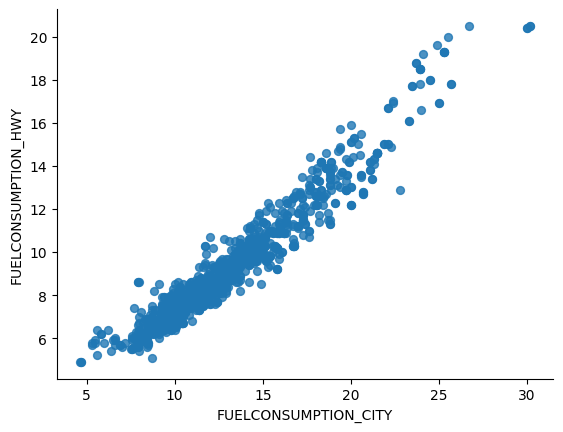

In [ ]:
# @title FUELCONSUMPTION_CITY vs FUELCONSUMPTION_HWY

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='FUELCONSUMPTION_CITY', y='FUELCONSUMPTION_HWY', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# resumo dos dados
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [ ]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


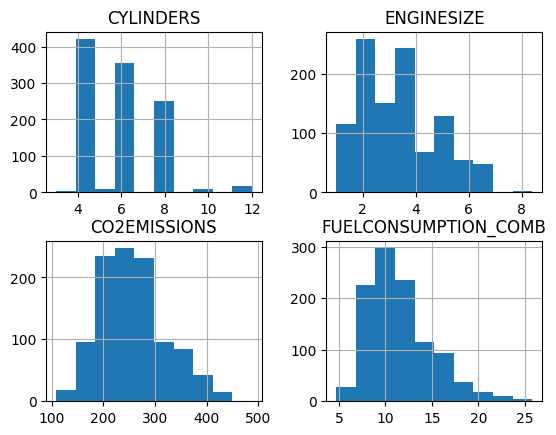

In [ ]:
#plotar as variáveis selecionadas
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

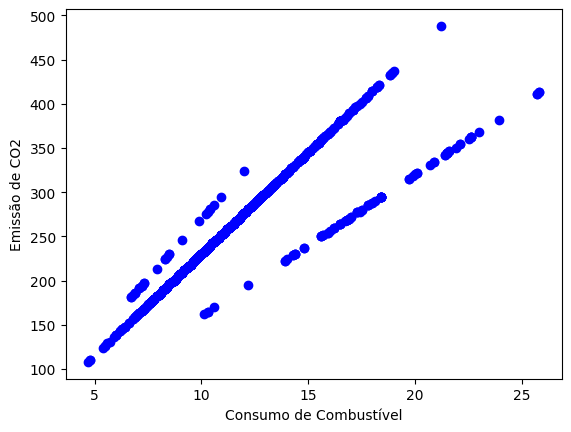

In [ ]:
# apresentando graficamente cada uma das variáveis selecionada em relação à emissão de Co2, para explorar o tipo de relação
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Consumo de Combustível")
plt.ylabel("Emissão de CO2")
plt.show()

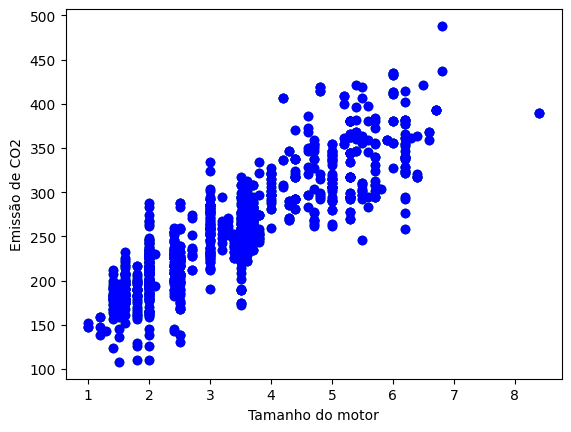

In [ ]:
# Plota gráfico de correlação entre as variável depedente, Emissão de CO2, em relação a variável idependente, Tamanho do Motor
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='green')
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Tamanho do motor")
plt.ylabel("Emissão de CO2")
plt.show()

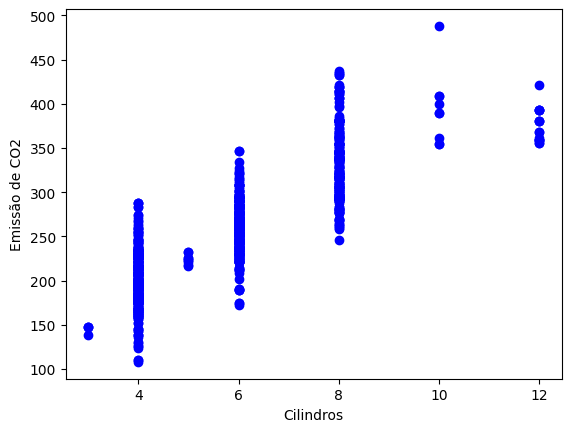

In [ ]:
# gráfico das CILINDRADAS versus a Emissão CO2, para explorar o tipo de relação
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cilindros")
plt.ylabel("Emissão de CO2")
plt.show()

## **Modelando os conjuntos de dados de treinamento e teste**

In [ ]:
# Cria um conjunto de dados de treinamento (0.8) e teste (0.2), a função np.random.rand() seleciona linhas aleatórias
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

A divisão Treino/Teste separa o conjunto de dados em dois conjuntos mutuamente exclusivos: um para treinamento e outro para teste. O modelo é treinado com o conjunto de treinamento e avaliado com o de teste, que não foi usado no treinamento, garantindo uma avaliação mais precisa de como o modelo generaliza para novos dados. Neste exemplo, 80% dos dados serão usados para treinamento e 20% para teste, com seleção aleatória feita pela função np.random.rand().

## **Modelo de Regressão Simples**

A Regressão Linear ajusta um modelo linear com coeficientes B = (B1, ..., Bn) para minimizar a "soma dos quadrados dos resíduos" entre o valor real *y* no conjunto de dados e o valor previsto *ŷ* usando aproximação linear.

A regressão linear encontra a melhor linha reta (modelo linear) que representa a relação entre os dados, minimizando a diferença entre os valores reais e os valores previstos pela linha. Essa diferença é chamada de "resíduo", e a regressão linear busca minimizar a soma dos quadrados desses resíduos.

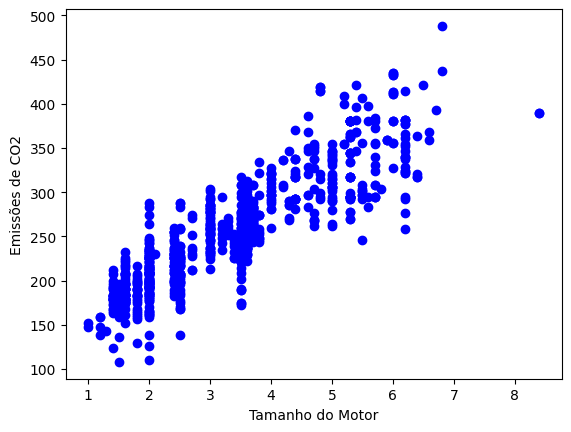

In [ ]:
#Treina o modelo com base na distribuição dos dados
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Tamanho do Motor")
plt.ylabel("Emissões de CO2")
plt.show()

In [ ]:
# Utilizando a biblioteca Scikit-learn para modelar os dados
from sklearn import linear_model
regr = linear_model.LinearRegression()
# Definição da variável preditora (X) e a variável alvo (y)
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
# Ajuste do modelo de regressão aos dados
regr.fit(train_x, train_y)
# Exibindo os coeficientes do modelo
print ('Coeficientes: ', regr.coef_)
print ('Intercepto: ',regr.intercept_)

Coeficientes:  [[38.93028954]]
Intercepto:  [126.13130998]


Numa regressão linear simples, o coeficiente e o intercepto são os parâmetros da linha de ajuste. O Scikit-learn percorre os dados e estima os parâmetros diretamente.

Text(0, 0.5, 'Emissão de CO2')

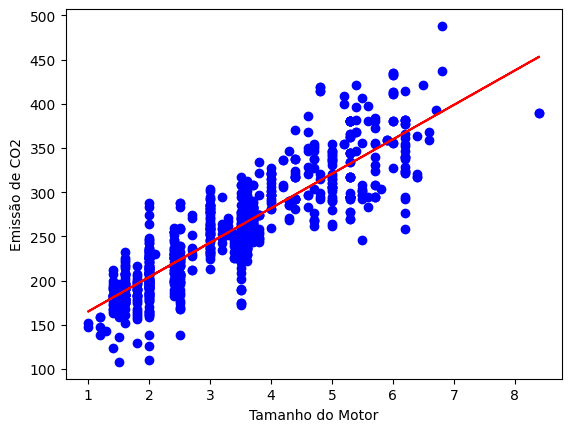

In [ ]:
# Plota novamente o gráfico, traçando a linha de ajuste (de tendência) dos dados
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Tamanho do Motor")
plt.ylabel("Emissão de CO2")

In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Erro Absoluto Médio (MAE): %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Erro Quadrático Médio (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R-quadrado: %.2f" % r2_score(test_y , test_y_) )

Erro Absoluto Médio (MAE): 24.68
Erro Quadrático Médio (MSE): 1086.53
R-quadrado: 0.75


In [ ]:
# Treina o modelo de regressão linear usando o train_x e o train_y
train_x = train[["FUELCONSUMPTION_COMB"]]
test_x = test[["FUELCONSUMPTION_COMB"]]
regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)
# Encontra as previsões usando a função de previsão do modelo e os dados test_x
predictions = regr.predict(test_x)
# Calcula o valor do erro médio absoluto usando as funções np.mean e np.absolute
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(predictions - test_y)))

Mean Absolute Error: 21.37


Coeficientes:  [[16.28803238]]
Intercepto:  [68.02342263]
Erro Absoluto Médio (MAE): 21.46
Erro Quadrático Médio (MSE): 915.44
R-quadrado: 0.78


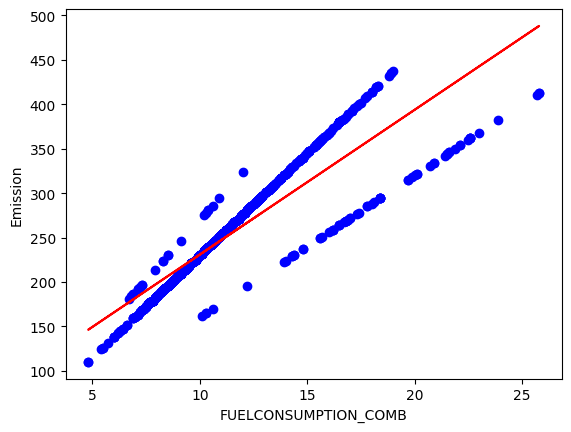

In [ ]:
# Treina o modelo de regressão usando a variável/feature FUELCONSUMPTION_COMB e apresenta as métricas de avaliação

train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr = linear_model.LinearRegression()
regr.fit (train_x, train_y)
print ('Coeficientes: ', regr.coef_)
print ('Intercepto: ',regr.intercept_)

plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")

test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Erro Absoluto Médio (MAE): %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Erro Quadrático Médio (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R-quadrado: %.2f" % r2_score(test_y , test_y_) )